In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd
from ipywidgets import interact
%matplotlib inline

DIVIDER = "-------------------------------------------------------"

Setting up the dataframe.

In [23]:
holder_df = pd.read_csv("Massachusetts_MEA_Database.csv")
df = holder_df
df.head()

,Unnamed: 0,Date,Year,Enforcement Action,Entity Name,Entity Type,Conduct,Location,URL - to be filled in,*Raw Text*
0,0,8/29/2021,2003,Temporary Cease and Desist,Mortgage One Financial Corp,Mortgage Broker,Acting as a mortgage broker without a license;...,Norwood MA,https://www.mass.gov/temporary-order-to-cease-...,NaN
1,1,10/31/2021,2003,Temporary Cease and Desist,Platinum Capital Group,"Mortgage Lender,Mortgage Broker",No license; violated a memoradum of understanding,"HQ Irvine CA, branch located in Concord CA",https://www.mass.gov/temporary-order-to-cease-...,NaN
2,2,10/31/2021,2003,Temporary Cease and Desist,"KN Management, Inc.",Mortgage Broker,No license,Concord MA,https://www.mass.gov/temporary-order-to-cease-...,NaN
3,3,12/23/2021,2003,Temporary Cease and Desist,INSTAFI.COM,"Mortgage Lender,Mortgage Broker",Conducting business in an unsafe or unsound ma...,Irvine CA,https://www.mass.gov/temporary-order-to-cease-...,NaN
4,4,12/30/2021,2003,Consent Order,"NovaStar Home Mortgage, Inc.","Mortgage Lender,Mortgage Broker",Conducting business with an unlicensed mortgag...,Kansas City MO,https://www.mass.gov/consent-order/novastar-ho...,NaN


In [ ]:
# Initial Exploration of Data
## Exploring and Cleaning Data

In [24]:
# Finding out initial information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             367 non-null    int64 
 1   Date                   367 non-null    object
 2   Year                   367 non-null    int64 
 3   Enforcement Action     367 non-null    object
 4   Entity Name            367 non-null    object
 5   Entity Type            367 non-null    object
 6   Conduct                329 non-null    object
 7   Location               328 non-null    object
 8   URL - to be filled in  325 non-null    object
 9   *Raw Text*             1 non-null      object
dtypes: int64(2), object(8)
memory usage: 28.8+ KB


In [25]:
# Finding column headings
df.columns.values.tolist()

['Unnamed: 0',
 'Date',
 'Year',
 'Enforcement Action',
 'Entity Name',
 'Entity Type',
 'Conduct',
 'Location',
 'URL - to be filled in',
 '*Raw Text*']

In [26]:
# Changing Dates of Dataframe
df["Date"] = pd.to_datetime(df["Date"])
# Removing URLs and Raw Text rows
df = df.drop(['URL - to be filled in','*Raw Text*'], axis=1)
# Replace ???s with NaN
df['Location'] = df['Location'].replace("???", np.nan)
df['Conduct'] = df['Conduct'].replace("???", np.nan)

In [39]:
# Get States
def get_States(location):
    if not pd.isnull(location):
        return location.split(" ")[-1]
    else:
        return location

df["States"] = df["Location"].apply(get_States)

In [100]:



# Clean up States

df["States"].value_counts()
df["States"]=df["States"].replace("California","CA")
df["States"]=df["States"].replace("Maryland,","MD")
df["States"]=df["States"].replace("Georgia","GA")
df["States"]=df["States"].replace("Maryland","MD")
df["States"]=df["States"].replace("Massachusetts","MA")
df["States"]=df["States"].replace("MA)","MA")
df["States"]=df["States"].replace("Ma","MA")


df_state = pd.crosstab(df["States"],df["Year"])
df_state.iloc[1,1]


Year,2003,2004,2005,2006,2007,2008,2009,2010
States,,,,,,,,
AZ,0,0,0,0,1,0,1,0
CA,2,0,0,1,2,3,16,4
CT,0,0,2,0,1,0,3,0
FL,0,0,0,0,2,0,4,0
GA,0,0,0,0,1,0,0,2
MA,2,5,5,8,5,14,64,47
MD,0,0,0,0,0,2,2,2
MO,1,0,0,0,0,0,1,1
NC,0,0,0,0,0,0,0,5


In [75]:
df_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in df.columns:
    tmp['column'] = [c]
    tmp['values'] = [df[c].unique()]
    tmp['values_count_incna'] = len(list(df[c].unique()))
    tmp['values_count_nona'] = int(df[c].nunique())
    tmp['num_miss'] = df[c].isnull().sum()
    tmp['pct_miss'] = (df[c].isnull().sum()/ len(df)).round(3)*100
    df_stats = df_stats.append(tmp)
    
df_stats

TypeError: unhashable type: 'list'

In [77]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               367 non-null    int64         
 1   Date                     367 non-null    datetime64[ns]
 2   Year                     367 non-null    int64         
 3   Enforcement Action       367 non-null    object        
 4   Entity Name              367 non-null    object        
 5   Entity Type              367 non-null    object        
 6   Conduct                  287 non-null    object        
 7   Location                 272 non-null    object        
 8   States                   272 non-null    object        
 9   Enforcement Action List  367 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 28.8+ KB


In [30]:
# Count unique entities who had MEAs against them in MA
df["Entity Name"].nunique()

342

In [31]:
def data_split(data_point):
    return data_point.split(",")

In [32]:
df['Year'].unique()
df["Enforcement Action List"] = df["Enforcement Action"].apply(data_split)
Enforcement_Action_counts = df["Enforcement Action List"].explode().value_counts()
Enforcement_Action_counts.tolist()

[172, 163, 10, 9, 7, 6, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [33]:
usa = gpd.read_file('./states/cb_2018_us_state_20m.shp')
usa = usa.to_crs("EPSG:3395")

# removing alaska, hawaii, and puerto rico
usa = usa.drop([7, 25, 48], axis = 0)
usa = usa.sort_values('STUSPS')
usa = usa.set_index('STUSPS')

In [34]:
df["Year"].value_counts()
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [102]:
@interact(col =['Year','Entity Name', 'States'])
def plot(col):
    ax1 = sns.countplot(x=col, data = df, order=df[col].value_counts().index)
    ax1.set_title(f"Count of {col}")
    show_values_on_bars(ax1, "v", 0.3)
    plt.show(ax1)
    

interactive(children=(Dropdown(description='col', options=('Year', 'Entity Name', 'States'), value='Year'), Ou…

<AxesSubplot:ylabel='Year'>

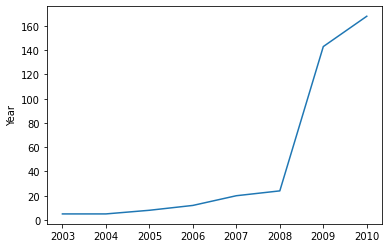

In [52]:
sns.lineplot(x=df2.Year.value_counts().index, y = df2.Year.value_counts())

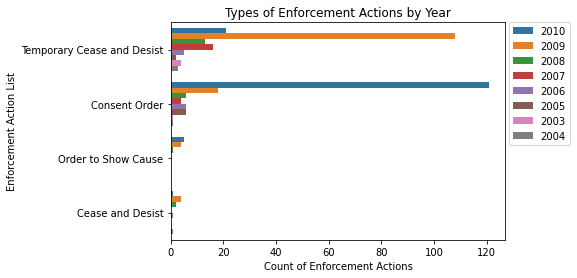

ValueError: cannot convert float NaN to integer

In [43]:
df2 = df
df2 = df2.explode("Enforcement Action List")
ax2 = sns.countplot(y="Enforcement Action List", data=df2, orient="h",order=df2["Enforcement Action List"].value_counts().index.values[0:4], hue= "Year", hue_order=df2["Year"].value_counts().index)
ax2.set_title("Types of Enforcement Actions by Year")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
ax2.set_xlabel("Count of Enforcement Actions")
plt.show(ax2)

In [78]:
df["Entity Type List"] = df["Entity Type"].apply(data_split)
Enforcement_Action_counts = df["Entity Type List"].explode().value_counts()
Enforcement_Action_counts.tolist()

[175, 112, 107, 37, 16, 10, 6, 5, 5, 2, 1, 1, 1, 1, 1]

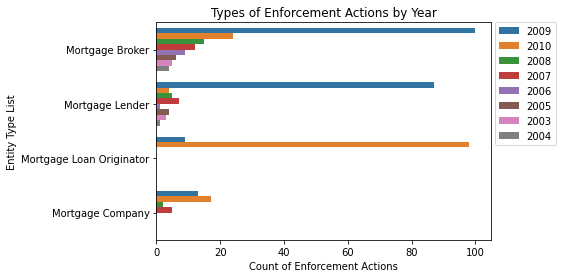

In [61]:
df2 = df
df2 = df2.explode("Entity Type List")
ax2 = sns.countplot(y="Entity Type List", data=df2, orient="h",order=df2["Entity Type List"].value_counts().index.values[0:4], hue= "Year", hue_order=df2["Year"].value_counts().index)
ax2.set_title("Types of Enforcement Actions by Year")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
ax2.set_xlabel("Count of Enforcement Actions")
plt.show(ax2)